In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import shutil
from PIL import Image

In [ ]:
os.listdir("Cotton Disease/")

['test', 'train', 'val']

In [ ]:
# Define the number of trees in the Random Forest
num_trees = 100

In [ ]:
# Define function to load and preprocess images + show results
def load_and_preprocess_images(image_paths, show_example=True):
    preprocessed_images = []

    # batasi contoh tampilan 3 gambar saja
    max_preview = 3
    preview_count = 0

    for image_path in image_paths:
        image = Image.open(image_path)

        # --- TAMPILKAN GAMBAR ASLI ---
        if show_example and preview_count < max_preview:
            plt.figure(figsize=(4,4))
            plt.imshow(image)
            plt.title("Original Image")
            plt.axis("off")
            plt.show()

            print("Original array shape:", np.array(image).shape)
            print("Original array sample (5 pixels):")
            print(np.array(image).reshape(-1, 3)[:5])
            print("-" * 50)

        # Resize
        image_resized = image.resize((224, 224))

        # --- TAMPILKAN HASIL RESIZE ---
        if show_example and preview_count < max_preview:
            plt.figure(figsize=(4,4))
            plt.imshow(image_resized)
            plt.title("Resized Image (224x224)")
            plt.axis("off")
            plt.show()

            print("Resized array shape:", np.array(image_resized).shape)
            print("Resized array sample (5 pixels):")
            print(np.array(image_resized).reshape(-1, 3)[:5])
            print("-" * 50)

        # Normalize
        image_normalized = np.array(image_resized) / 255.0

        # --- TAMPILKAN HASIL NORMALISASI ---
        if show_example and preview_count < max_preview:
            print("Normalized pixel sample (5 values):")
            print(image_normalized.reshape(-1, 3)[:5])
            print("Min pixel value:", image_normalized.min())
            print("Max pixel value:", image_normalized.max())
            print("=" * 80)

        preprocessed_images.append(image_normalized)

        preview_count += 1

    preprocessed_images = np.array(preprocessed_images)
    preprocessed_images = preprocessed_images.reshape(preprocessed_images.shape[0], -1)

    return preprocessed_images


In [ ]:
# Define function for local model training
def local_train(X_local, y_local):
    clf = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    clf.fit(X_local, y_local)
    return clf

In [ ]:
# Define function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    y_pred_proba = model.predict_proba(X_test)
    return accuracy, y_pred, y_pred_proba

In [ ]:
data = "Cotton Disease"
# Define paths to the train, test, and val directories
train_path = 'Cotton Disease/train'
test_path = 'Cotton Disease/test'
val_path = 'Cotton Disease/val'
# Define the path to the combined directory
combined_path = 'Cotton Disease/combined_dataset'

# Create the combined directory if it doesn't exist
os.makedirs(combined_path, exist_ok=True)
# Function to copy images from source directory to destination directory
def copy_images(source_dir, dest_dir):
    for subdir in os.listdir(source_dir):
        subdir_path = os.path.join(source_dir, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    dest_subdir_path = os.path.join(dest_dir, subdir)
                    os.makedirs(dest_subdir_path, exist_ok=True)
                    try:
                        shutil.copy(file_path, os.path.join(dest_subdir_path, file))
                        print(f"Successfully copied: {file_path}")
                    except Exception as e:
                        print(f"Error copying file: {file_path}, Error: {e}")
# Copy images from train directory
copy_images(train_path, combined_path)

# Copy images from test directory
copy_images(test_path, combined_path)

# Copy images from val directory
copy_images(val_path, combined_path)

print("Images combined successfully.")

Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (209)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (156)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (184)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (236)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (269)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (272)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (150)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (263)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (199)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (255)_iaip.jpg
Successfully copied: Cotton Disease/train/diseased cotton leaf/dis_leaf (201)_iaip.jpg
Successfully copied: Cotton Disease/train/d

In [ ]:
# Directory containing the dataset
dataset_dir = "Cotton Disease/combined_dataset"

In [ ]:
os.listdir(dataset_dir)

['diseased cotton leaf', 'fresh cotton leaf']

In [ ]:
# List of classes (subdirectories) in the dataset directory
classes = os.listdir(dataset_dir)


In [ ]:
# Combine all data from different classes
X, y = [], []
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        X.append(image_path)
        y.append(class_name)

In [ ]:
# Convert class labels to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

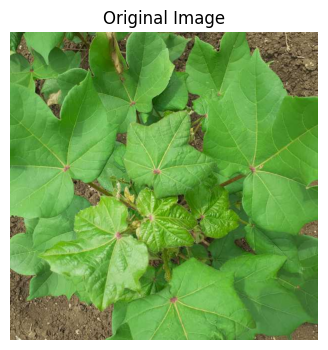

Original array shape: (617, 617, 3)
Original array sample (5 pixels):
[[ 95 155  85]
 [ 90 150  80]
 [ 78 138  68]
 [ 70 130  60]
 [ 79 136  67]]
--------------------------------------------------


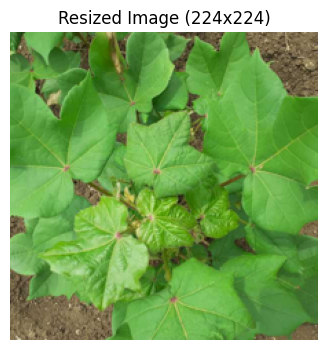

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[ 87 147  77]
 [ 74 132  63]
 [ 95 150  82]
 [ 87 138  71]
 [ 62 110  45]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.34117647 0.57647059 0.30196078]
 [0.29019608 0.51764706 0.24705882]
 [0.37254902 0.58823529 0.32156863]
 [0.34117647 0.54117647 0.27843137]
 [0.24313725 0.43137255 0.17647059]]
Min pixel value: 0.0
Max pixel value: 0.9215686274509803


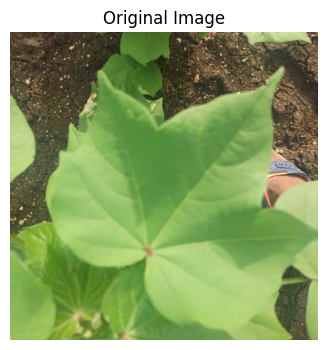

Original array shape: (694, 694, 3)
Original array sample (5 pixels):
[[ 83  67  51]
 [100  84  68]
 [113  97  81]
 [106  90  74]
 [ 84  68  52]]
--------------------------------------------------


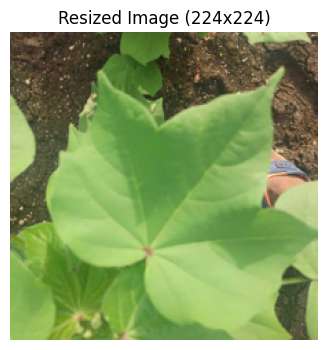

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[92 76 60]
 [81 65 49]
 [72 56 40]
 [86 70 54]
 [84 69 52]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.36078431 0.29803922 0.23529412]
 [0.31764706 0.25490196 0.19215686]
 [0.28235294 0.21960784 0.15686275]
 [0.3372549  0.2745098  0.21176471]
 [0.32941176 0.27058824 0.20392157]]
Min pixel value: 0.0196078431372549
Max pixel value: 1.0


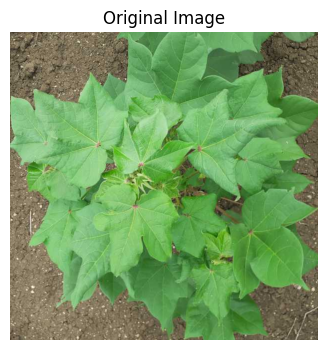

Original array shape: (617, 617, 3)
Original array sample (5 pixels):
[[121 112  95]
 [105  96  79]
 [ 90  81  64]
 [ 83  74  57]
 [ 75  66  49]]
--------------------------------------------------


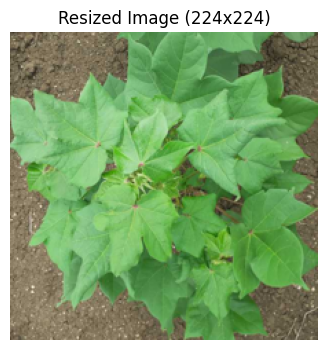

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[ 93  84  67]
 [ 79  70  53]
 [ 64  55  38]
 [ 85  76  59]
 [100  91  74]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.36470588 0.32941176 0.2627451 ]
 [0.30980392 0.2745098  0.20784314]
 [0.25098039 0.21568627 0.14901961]
 [0.33333333 0.29803922 0.23137255]
 [0.39215686 0.35686275 0.29019608]]
Min pixel value: 0.00392156862745098
Max pixel value: 1.0


In [ ]:
# Load and preprocess images for the training set
X_train_processed = load_and_preprocess_images(X_train)

In [ ]:
# Train the local model
local_model = local_train(X_train_processed, y_train)

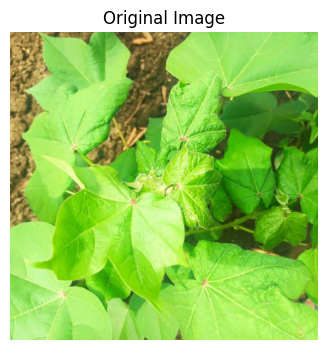

Original array shape: (694, 694, 3)
Original array sample (5 pixels):
[[184 156  72]
 [179 151  67]
 [176 148  65]
 [181 153  70]
 [193 164  84]]
--------------------------------------------------


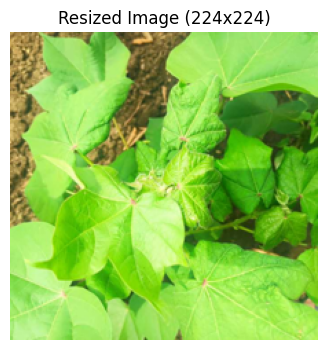

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[184 156  74]
 [198 169  91]
 [185 155  82]
 [152 122  55]
 [158 127  64]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.72156863 0.61176471 0.29019608]
 [0.77647059 0.6627451  0.35686275]
 [0.7254902  0.60784314 0.32156863]
 [0.59607843 0.47843137 0.21568627]
 [0.61960784 0.49803922 0.25098039]]
Min pixel value: 0.0
Max pixel value: 1.0


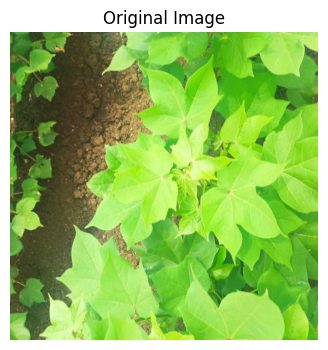

Original array shape: (694, 694, 3)
Original array sample (5 pixels):
[[61 83 47]
 [65 90 51]
 [68 95 54]
 [63 96 49]
 [58 97 42]]
--------------------------------------------------


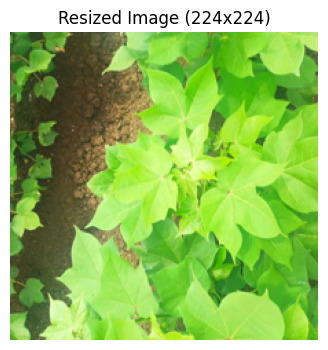

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[ 54  82  40]
 [ 62 103  46]
 [ 67 125  48]
 [ 75 148  53]
 [ 84 162  62]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.21176471 0.32156863 0.15686275]
 [0.24313725 0.40392157 0.18039216]
 [0.2627451  0.49019608 0.18823529]
 [0.29411765 0.58039216 0.20784314]
 [0.32941176 0.63529412 0.24313725]]
Min pixel value: 0.0
Max pixel value: 1.0


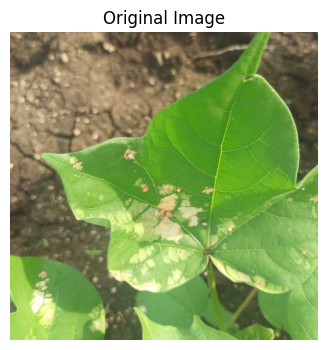

Original array shape: (694, 694, 3)
Original array sample (5 pixels):
[[161 134 105]
 [161 134 105]
 [160 133 103]
 [155 128  98]
 [150 123  93]]
--------------------------------------------------


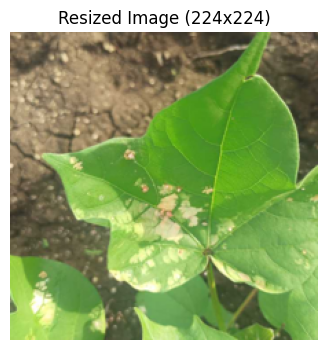

Resized array shape: (224, 224, 3)
Resized array sample (5 pixels):
[[162 136 106]
 [158 133 102]
 [164 139 104]
 [160 136  96]
 [155 131  90]]
--------------------------------------------------
Normalized pixel sample (5 values):
[[0.63529412 0.53333333 0.41568627]
 [0.61960784 0.52156863 0.4       ]
 [0.64313725 0.54509804 0.40784314]
 [0.62745098 0.53333333 0.37647059]
 [0.60784314 0.51372549 0.35294118]]
Min pixel value: 0.0196078431372549
Max pixel value: 1.0


In [ ]:
# Load and preprocess images for the testing set
X_test_processed = load_and_preprocess_images(X_test)

In [ ]:
# Evaluate the local model
accuracy, y_pred, y_pred_proba = evaluate_model(local_model, X_test_processed, y_test)
print(f"Local Model Accuracy: {accuracy * 100:.2f}%")

Local Model Accuracy: 83.91%


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       246
           1       0.85      0.80      0.82       214

    accuracy                           0.84       460
   macro avg       0.84      0.84      0.84       460
weighted avg       0.84      0.84      0.84       460



In [ ]:
# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[215  31]
 [ 43 171]]


In [ ]:
# ================================
# FUNGSI PREDIKSI 1 GAMBAR
# ================================

def predict_single_image(image_path):
    # Load image
    image = Image.open(image_path)

    # Preprocess sama seperti training
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = image.reshape(1, -1)  # reshape ke 2D (1, fitur)

    # Prediksi
    pred_label = local_model.predict(image)[0]
    pred_class = label_encoder.inverse_transform([pred_label])[0]

    # Tampilkan hasil
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.title(f"Prediction : {pred_class}")
    plt.show()

    return pred_class


Upload 1 gambar daun kapas untuk prediksi:


Saving kapas sehat.jpeg to kapas sehat.jpeg
File uploaded: kapas sehat.jpeg


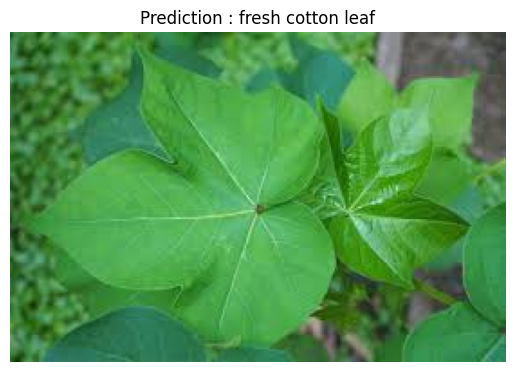

Prediksi model: fresh cotton leaf


In [ ]:
# ================================
# UPLOAD GAMBAR UNTUK DI-TEST
# ================================

from google.colab import files

print("Upload 1 gambar daun kapas untuk prediksi:")
uploaded = files.upload()

for filename in uploaded.keys():
    file_path = filename
    print(f"File uploaded: {file_path}")

    # Prediksi gambar
    hasil = predict_single_image(file_path)
    print("Prediksi model:", hasil)


Upload 1 gambar daun kapas untuk prediksi:


Saving cercospora-leaf-spot-of-cotton-cotton-2.jpg to cercospora-leaf-spot-of-cotton-cotton-2.jpg
File uploaded: cercospora-leaf-spot-of-cotton-cotton-2.jpg


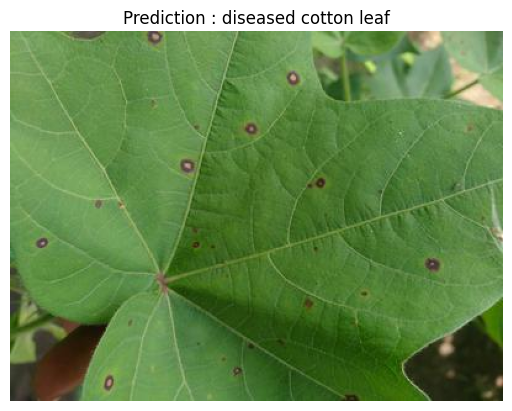

Prediksi model: diseased cotton leaf


In [ ]:
# ================================
# UPLOAD GAMBAR UNTUK DI-TEST
# ================================

from google.colab import files

print("Upload 1 gambar daun kapas untuk prediksi:")
uploaded = files.upload()

for filename in uploaded.keys():
    file_path = filename
    print(f"File uploaded: {file_path}")

    # Prediksi gambar
    hasil = predict_single_image(file_path)
    print("Prediksi model:", hasil)


Upload 1 gambar daun kapas untuk prediksi:


Saving dis_leaf (124).jpg to dis_leaf (124).jpg
File uploaded: dis_leaf (124).jpg


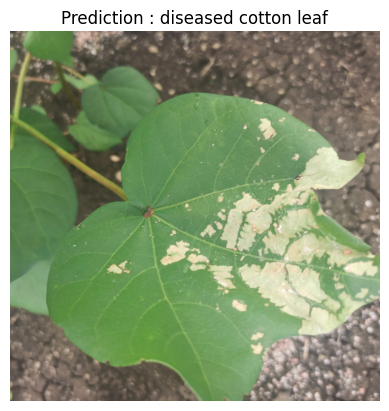

Prediksi model: diseased cotton leaf


In [ ]:
# ================================
# UPLOAD GAMBAR UNTUK DI-TEST
# ================================

from google.colab import files

print("Upload 1 gambar daun kapas untuk prediksi:")
uploaded = files.upload()

for filename in uploaded.keys():
    file_path = filename
    print(f"File uploaded: {file_path}")

    # Prediksi gambar
    hasil = predict_single_image(file_path)
    print("Prediksi model:", hasil)
